In [1]:
#Import Data
from Bio import SeqIO
sequence_virus1 = ""
for seq_record in SeqIO.parse("HIV.fasta", "fasta"):
    sequence_virus1=sequence_virus1+seq_record.seq
sequence_virus2= ""
for seq_record in SeqIO.parse("coronavirus.fasta", "fasta"):
    print(seq_record.seq)
    sequence_virus2=sequence_virus2+seq_record.seq
sequence_virus3= ""
for seq_record in SeqIO.parse("tuberculosis.fasta", "fasta"):
    sequence_virus3=sequence_virus3+seq_record.seq

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

In [20]:
len(str('AAAATTAAGGCCTGCATTGATGAGGTTACCACAACACTGGAAGAAACTAAGTTTCTTACC'))

60

In [2]:
s = 'TGGCATCTTTTTCTGCTTCCACAAGTGCTTTTGTGGAAACTGTGAAAGGTTTGGAT'
s = ''.join([(str(ord(x)-96) if x.isalpha() else x) for x in list(s)])
print(s)

-12-25-25-29-31-12-29-12-12-12-12-12-29-12-25-29-12-12-29-29-31-29-31-31-25-12-25-29-12-12-12-12-25-12-25-25-31-31-31-29-12-25-12-25-31-31-31-25-25-12-12-12-25-25-31-12


In [3]:
'''sliding windows to split data in k-mers'''
def split_to_k_mers(seq,step,window):
    result=[]
    for i in range(0,(len(seq)-window),step):
        result.append(str(seq[i:i + window]))
    return result

In [5]:
k=100
window=10
chunks_seq_virus1=split_to_k_mers(sequence_virus1,window,k)
chunks_seq_virus2=split_to_k_mers(sequence_virus3,window,k)
#chunks_seq_virus3=split_to_k_mers(sequence_virus3,window,k)
# chunks_seq_virus1=[sequence_virus1[i:i+k] for i in range(0, len(sequence_virus1), k)]
# chunks_seq_virus2=[sequence_virus2[i:i+k] for i in range(0, len(sequence_virus2), k)]
# chunks_seq_virus3=[sequence_virus2[i:i+k] for i in range(0, len(sequence_virus2), k)]

In [63]:
# Create the dataframes
df_hiv = pd.DataFrame(chunks_seq_virus1)
df_hiv['org']='HIV'
df_covid = pd.DataFrame(chunks_seq_virus2)
df_covid['org']='COVID_19'
df_tubercolosa = pd.DataFrame(chunks_seq_virus3)
df_tubercolosa['org']='Tubercolosa'
df_not_transform = pd.concat([df_tubercolosa,df_covid,df_hiv])

In [7]:
def transformArrayofStringToArrayofNum(arr):
    result=[]
    for i in arr:
        temp=[]
        for j in i:
            temp.append(-(ord(j)-96))
        result.append(temp)
    return result

In [8]:
transform_hiv=transformArrayofStringToArrayofNum(chunks_seq_virus1)
transform_corona=transformArrayofStringToArrayofNum(chunks_seq_virus2)
#transform_tubercolosa=transformArrayofStringToArrayofNum(chunks_seq_virus3)

In [10]:
import pandas as pd

# Create the dataframes
df_hiv = pd.DataFrame(transform_hiv)
df_hiv['org']='HIV'
df_covid = pd.DataFrame(transform_corona)
df_covid['org']='COVID_19'
# df_tubercolosa = pd.DataFrame(transform_tubercolosa)
# df_tubercolosa['org']='Tubercolosa'
df = pd.concat([df_covid,df_hiv])

In [11]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples, silhouette_score
# x=df_covid
# for num_clusters in range(2,10):
#     clusterer = KMeans(n_clusters=num_clusters, n_jobs=4)
#     preds = clusterer.fit_predict(x)
#     # centers = clusterer.cluster_centers_
#     score = silhouette_score (x, preds, metric='euclidean')
#     print ("For n_clusters = {}, Kmeans silhouette score is {})".format(num_clusters, score))

In [12]:
def k_means_model_generator(data,n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, n_jobs=4)
    y_pred_kmeans = kmeans.fit_predict(data)
    return y_pred_kmeans

In [13]:
def train_test_split(x):
    train_size=int(len(x)*0.85)
    train=x[0:train_size]
    test=x[train_size:]
    return train,test

In [14]:
df_=df.copy()
df_=df_.drop(['org'], axis=1)
X_train,X_test = train_test_split(df_)

In [15]:
X_train.shape

(375745, 100)

In [ ]:
#https://machinelearningmastery.com/autoencoder-for-classification/

Epoch 1/1000
23485/23485 - 69s - loss: 39.7747 - val_loss: 32.0881
Epoch 2/1000
23485/23485 - 70s - loss: 31.6596 - val_loss: 28.3266
Epoch 3/1000
23485/23485 - 71s - loss: 29.1980 - val_loss: 26.8532
Epoch 4/1000
23485/23485 - 77s - loss: 28.1197 - val_loss: 25.8336
Epoch 5/1000
23485/23485 - 79s - loss: 27.5160 - val_loss: 25.7046
Epoch 6/1000
23485/23485 - 93s - loss: 27.1948 - val_loss: 25.3041
Epoch 7/1000
23485/23485 - 91s - loss: 27.0070 - val_loss: 25.3928
Epoch 8/1000
23485/23485 - 90s - loss: 26.8925 - val_loss: 25.6667
Epoch 9/1000
23485/23485 - 92s - loss: 26.7899 - val_loss: 25.2332
Epoch 10/1000
23485/23485 - 93s - loss: 26.6274 - val_loss: 25.0624
Epoch 11/1000
23485/23485 - 91s - loss: 26.4752 - val_loss: 24.7136
Epoch 12/1000
23485/23485 - 90s - loss: 26.3325 - val_loss: 24.8727
Epoch 13/1000
23485/23485 - 92s - loss: 26.2035 - val_loss: 25.0459
Epoch 14/1000
23485/23485 - 92s - loss: 26.0877 - val_loss: 24.5575
Epoch 15/1000
23485/23485 - 93s - loss: 25.9440 - val_los

Epoch 122/1000
23485/23485 - 91s - loss: 23.9036 - val_loss: 21.8092
Epoch 123/1000
23485/23485 - 93s - loss: 23.8949 - val_loss: 21.8116
Epoch 124/1000
23485/23485 - 98s - loss: 23.8849 - val_loss: 21.7652
Epoch 125/1000
23485/23485 - 98s - loss: 23.8813 - val_loss: 21.8026
Epoch 126/1000
23485/23485 - 96s - loss: 23.8802 - val_loss: 21.7338
Epoch 127/1000
23485/23485 - 98s - loss: 23.8671 - val_loss: 21.7358
Epoch 128/1000
23485/23485 - 96s - loss: 23.8548 - val_loss: 21.6918
Epoch 129/1000
23485/23485 - 97s - loss: 23.8524 - val_loss: 21.5582
Epoch 130/1000
23485/23485 - 94s - loss: 23.8464 - val_loss: 21.7005
Epoch 131/1000
23485/23485 - 96s - loss: 23.8370 - val_loss: 21.4639
Epoch 132/1000
23485/23485 - 94s - loss: 23.8359 - val_loss: 21.6135
Epoch 133/1000
23485/23485 - 94s - loss: 23.8393 - val_loss: 21.7673
Epoch 134/1000
23485/23485 - 93s - loss: 23.8248 - val_loss: 21.5993
Epoch 135/1000
23485/23485 - 90s - loss: 23.8044 - val_loss: 21.7312
Epoch 136/1000
23485/23485 - 91s -

Epoch 241/1000
23485/23485 - 70s - loss: 23.3991 - val_loss: 21.4068
Epoch 242/1000
23485/23485 - 70s - loss: 23.3885 - val_loss: 21.1833
Epoch 243/1000
23485/23485 - 70s - loss: 23.3882 - val_loss: 21.2588
Epoch 244/1000
23485/23485 - 70s - loss: 23.3920 - val_loss: 21.1644
Epoch 245/1000
23485/23485 - 70s - loss: 23.3817 - val_loss: 21.0525
Epoch 246/1000
23485/23485 - 70s - loss: 23.3705 - val_loss: 21.1492
Epoch 247/1000
23485/23485 - 70s - loss: 23.3762 - val_loss: 21.0787
Epoch 248/1000
23485/23485 - 70s - loss: 23.3605 - val_loss: 21.1250
Epoch 249/1000
23485/23485 - 70s - loss: 23.3535 - val_loss: 21.2853
Epoch 250/1000
23485/23485 - 70s - loss: 23.3445 - val_loss: 21.1460
Epoch 251/1000
23485/23485 - 70s - loss: 23.3562 - val_loss: 21.2048
Epoch 252/1000
23485/23485 - 71s - loss: 23.3436 - val_loss: 21.2632
Epoch 253/1000
23485/23485 - 69s - loss: 23.3330 - val_loss: 21.0399
Epoch 254/1000
23485/23485 - 69s - loss: 23.3219 - val_loss: 20.9591
Epoch 255/1000
23485/23485 - 69s -

Epoch 360/1000
23485/23485 - 69s - loss: 23.1378 - val_loss: 21.0697
Epoch 361/1000
23485/23485 - 70s - loss: 23.1484 - val_loss: 20.8507
Epoch 362/1000
23485/23485 - 69s - loss: 23.1360 - val_loss: 20.9990
Epoch 363/1000
23485/23485 - 70s - loss: 23.1365 - val_loss: 20.6949
Epoch 364/1000
23485/23485 - 69s - loss: 23.1435 - val_loss: 20.9696
Epoch 365/1000
23485/23485 - 69s - loss: 23.1382 - val_loss: 20.8015
Epoch 366/1000
23485/23485 - 69s - loss: 23.1402 - val_loss: 20.9786
Epoch 367/1000
23485/23485 - 69s - loss: 23.1372 - val_loss: 20.8186
Epoch 368/1000
23485/23485 - 70s - loss: 23.1320 - val_loss: 20.9283
Epoch 369/1000
23485/23485 - 73s - loss: 23.1369 - val_loss: 20.8489
Epoch 370/1000
23485/23485 - 70s - loss: 23.1326 - val_loss: 20.8800
Epoch 371/1000
23485/23485 - 70s - loss: 23.1323 - val_loss: 20.8033
Epoch 372/1000
23485/23485 - 71s - loss: 23.1403 - val_loss: 21.2034
Epoch 373/1000
23485/23485 - 70s - loss: 23.1314 - val_loss: 20.9265
Epoch 374/1000
23485/23485 - 71s -

Epoch 479/1000
23485/23485 - 74s - loss: 23.0927 - val_loss: 20.7745
Epoch 480/1000
23485/23485 - 74s - loss: 23.0931 - val_loss: 20.7766
Epoch 481/1000
23485/23485 - 74s - loss: 23.0920 - val_loss: 20.6794
Epoch 482/1000
23485/23485 - 73s - loss: 23.0878 - val_loss: 20.7189
Epoch 483/1000
23485/23485 - 74s - loss: 23.0883 - val_loss: 20.6416
Epoch 484/1000
23485/23485 - 74s - loss: 23.0841 - val_loss: 20.7749
Epoch 485/1000
23485/23485 - 74s - loss: 23.0886 - val_loss: 20.8961
Epoch 486/1000
23485/23485 - 74s - loss: 23.0948 - val_loss: 20.6792
Epoch 487/1000
23485/23485 - 81s - loss: 23.0868 - val_loss: 20.7020
Epoch 488/1000
23485/23485 - 76s - loss: 23.0878 - val_loss: 20.9738
Epoch 489/1000
23485/23485 - 75s - loss: 23.0928 - val_loss: 20.9504
Epoch 490/1000
23485/23485 - 74s - loss: 23.0829 - val_loss: 20.8366
Epoch 491/1000
23485/23485 - 75s - loss: 23.0896 - val_loss: 20.7240
Epoch 492/1000
23485/23485 - 75s - loss: 23.0840 - val_loss: 20.7569
Epoch 493/1000
23485/23485 - 78s -

Epoch 598/1000
23485/23485 - 71s - loss: 22.9145 - val_loss: 20.7104
Epoch 599/1000
23485/23485 - 71s - loss: 22.9069 - val_loss: 20.5075
Epoch 600/1000
23485/23485 - 71s - loss: 22.9114 - val_loss: 20.5054
Epoch 601/1000
23485/23485 - 71s - loss: 22.9051 - val_loss: 20.6697
Epoch 602/1000
23485/23485 - 70s - loss: 22.9110 - val_loss: 20.6199
Epoch 603/1000
23485/23485 - 72s - loss: 22.8990 - val_loss: 20.3901
Epoch 604/1000
23485/23485 - 71s - loss: 22.9022 - val_loss: 20.5167
Epoch 605/1000
23485/23485 - 71s - loss: 22.8992 - val_loss: 20.4882
Epoch 606/1000
23485/23485 - 71s - loss: 22.8994 - val_loss: 20.6355
Epoch 607/1000
23485/23485 - 70s - loss: 22.8980 - val_loss: 20.5512
Epoch 608/1000
23485/23485 - 71s - loss: 22.8983 - val_loss: 20.5350
Epoch 609/1000
23485/23485 - 71s - loss: 22.8936 - val_loss: 20.3229
Epoch 610/1000
23485/23485 - 71s - loss: 22.9027 - val_loss: 20.2782
Epoch 611/1000
23485/23485 - 70s - loss: 22.8921 - val_loss: 20.5493
Epoch 612/1000
23485/23485 - 70s -

Epoch 717/1000
23485/23485 - 71s - loss: 22.8680 - val_loss: 20.4508
Epoch 718/1000
23485/23485 - 71s - loss: 22.8701 - val_loss: 20.4909
Epoch 719/1000
23485/23485 - 71s - loss: 22.8717 - val_loss: 20.5306
Epoch 720/1000
23485/23485 - 70s - loss: 22.8635 - val_loss: 20.3103
Epoch 721/1000
23485/23485 - 71s - loss: 22.8534 - val_loss: 20.4867
Epoch 722/1000
23485/23485 - 71s - loss: 22.8589 - val_loss: 20.3454
Epoch 723/1000
23485/23485 - 70s - loss: 22.8609 - val_loss: 20.4491
Epoch 724/1000
23485/23485 - 71s - loss: 22.8665 - val_loss: 20.3130
Epoch 725/1000
23485/23485 - 71s - loss: 22.8671 - val_loss: 20.4733
Epoch 726/1000
23485/23485 - 71s - loss: 22.8612 - val_loss: 20.7764
Epoch 727/1000
23485/23485 - 70s - loss: 22.8682 - val_loss: 20.4306
Epoch 728/1000
23485/23485 - 71s - loss: 22.8606 - val_loss: 20.5554
Epoch 729/1000
23485/23485 - 71s - loss: 22.8614 - val_loss: 20.4211
Epoch 730/1000
23485/23485 - 71s - loss: 22.8667 - val_loss: 20.5843
Epoch 731/1000
23485/23485 - 71s -

Epoch 836/1000
23485/23485 - 71s - loss: 22.8389 - val_loss: 20.4109
Epoch 837/1000
23485/23485 - 70s - loss: 22.8421 - val_loss: 20.3596
Epoch 838/1000
23485/23485 - 71s - loss: 22.8478 - val_loss: 20.4310
Epoch 839/1000
23485/23485 - 70s - loss: 22.8474 - val_loss: 20.4675
Epoch 840/1000
23485/23485 - 71s - loss: 22.8321 - val_loss: 20.3071
Epoch 841/1000
23485/23485 - 71s - loss: 22.8448 - val_loss: 20.5273
Epoch 842/1000
23485/23485 - 71s - loss: 22.8413 - val_loss: 20.5211
Epoch 843/1000
23485/23485 - 71s - loss: 22.8525 - val_loss: 20.3335
Epoch 844/1000
23485/23485 - 71s - loss: 22.8439 - val_loss: 20.5071
Epoch 845/1000
23485/23485 - 71s - loss: 22.8401 - val_loss: 20.5419
Epoch 846/1000
23485/23485 - 71s - loss: 22.8415 - val_loss: 20.3312
Epoch 847/1000
23485/23485 - 70s - loss: 22.8380 - val_loss: 20.2956
Epoch 848/1000
23485/23485 - 70s - loss: 22.8349 - val_loss: 20.5435
Epoch 849/1000
23485/23485 - 71s - loss: 22.8467 - val_loss: 20.4035
Epoch 850/1000
23485/23485 - 70s -

Epoch 955/1000
23485/23485 - 71s - loss: 22.5727 - val_loss: 20.2883
Epoch 956/1000
23485/23485 - 70s - loss: 22.5800 - val_loss: 20.2731
Epoch 957/1000
23485/23485 - 71s - loss: 22.5738 - val_loss: 20.2407
Epoch 958/1000
23485/23485 - 71s - loss: 22.5667 - val_loss: 20.3917
Epoch 959/1000
23485/23485 - 71s - loss: 22.5716 - val_loss: 20.0477
Epoch 960/1000
23485/23485 - 70s - loss: 22.5695 - val_loss: 20.1499
Epoch 961/1000
23485/23485 - 70s - loss: 22.5628 - val_loss: 20.3846
Epoch 962/1000
23485/23485 - 70s - loss: 22.5601 - val_loss: 20.1169
Epoch 963/1000
23485/23485 - 71s - loss: 22.5531 - val_loss: 20.3899
Epoch 964/1000
23485/23485 - 71s - loss: 22.5587 - val_loss: 20.1628
Epoch 965/1000
23485/23485 - 71s - loss: 22.5505 - val_loss: 20.1944
Epoch 966/1000
23485/23485 - 71s - loss: 22.5478 - val_loss: 20.2386
Epoch 967/1000
23485/23485 - 71s - loss: 22.5389 - val_loss: 20.3878
Epoch 968/1000
23485/23485 - 71s - loss: 22.5397 - val_loss: 20.3268
Epoch 969/1000
23485/23485 - 71s -

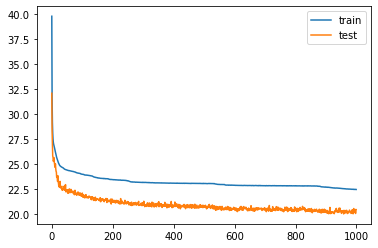

In [16]:

# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

n_inputs = X_train.shape[1]
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs/2)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 3
e = Dense(n_inputs/4)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = n_inputs/4
#decoder
encoder = Dense(n_bottleneck,activation='relu')(e)
# define decoder, level 1
d = Dense(n_inputs/4)(encoder)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# define decoder, level 1
d = Dense(n_inputs/2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
decoder = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
autoencoder_model = Model(inputs=visible, outputs=decoder)
autoencoder_model.compile(optimizer='adam', loss='mse')
# fit the autoencoder model to reconstruct input
history = autoencoder_model.fit(X_train, X_train, epochs=1000, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
encoder_model = Model(inputs=visible, outputs=encoder, name='encoder')

In [17]:
# from keras.layers import Layer
# from keras.layers import InputSpec
# from keras import backend as K
# !pip install Keras
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import InputSpec
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D 
from tensorflow.keras import backend as K 
# #from keras.engine.topology import Layer
# from keras import initializers, regularizers, constraints

# from keras.layers import Dense, Input, LSTM, Bidirectional, Activation, Conv1D, GRU, TimeDistributed
# from keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, SpatialDropout1D
# from keras.layers import GlobalAveragePooling1D, BatchNormalization, concatenate
# from keras.layers import Reshape, merge, Concatenate, Lambda, Average
# from keras.models import Sequential, Model
# from keras.initializers import Constant
# from keras.layers.merge import add

class ClusteringLayer(Layer):
    """
    Clustering layer converts input sample (feature) to soft label.

    # Example
    ```
        model.add(ClusteringLayer(n_clusters=10))
    ```
    # Arguments
        n_clusters: number of clusters.
        weights: list of Numpy array with shape `(n_clusters, n_features)` witch represents the initial cluster centers.
        alpha: degrees of freedom parameter in Student's t-distribution. Default to 1.0.
    # Input shape
        2D tensor with shape: `(n_samples, n_features)`.
    # Output shape
        2D tensor with shape: `(n_samples, n_clusters)`.
    """

    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight(shape=(self.n_clusters, input_dim), initializer='glorot_uniform', name='clusters')
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, inputs, **kwargs):
        """ student t-distribution, as same as used in t-SNE algorithm.        
                 q_ij = 1/(1+dist(x_i, µ_j)^2), then normalize it.
                 q_ij can be interpreted as the probability of assigning sample i to cluster j.
                 (i.e., a soft assignment)
        Arguments:
            inputs: the variable containing data, shape=(n_samples, n_features)
        Return:
            q: student's t-distribution, or soft labels for each sample. shape=(n_samples, n_clusters)
        """
        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1)) # Make sure each sample's 10 values add up to 1.
        return q

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters

    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [18]:
from sklearn.cluster import KMeans
n_clusters=250
clustering_layer = ClusteringLayer(n_clusters, name='clustering')(encoder_model.output)
model = Model(inputs=encoder_model.input, outputs=clustering_layer)
model.compile(optimizer='sgd', loss='kld')
# Initialize cluster centers using k-means.
kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoder_model.predict(X_train))
model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])

In [40]:
def fitness(individual, data):
    temp=0;
    cNum=1
    for x in data:
        if temp < x['score']:
            temp=x['score']
            cNum=x['clusterNum']
    return cNum

In [44]:
import time

X=encoder_model.predict(df_[0:2000])
#print(X.head(5))
start = time.time()
arr=[];
for i in range(2,30):
    cluster_labels = KMeans(n_clusters=i, init='k-means++').fit_predict(X)
    arr.append({'clusterNum': i , 'score': silhouette_score(X, cluster_labels)})
    print({'clusterNum': i , 'score': silhouette_score(X, cluster_labels)})
#initialise the GA with data
ga = pyeasyga.GeneticAlgorithm(arr)
ga.fitness_function = fitness               # set the GA's fitness function
ga.run()                                    # run the GA
print(ga.best_individual())
end = time.time()
print("Time for executing Kmeans++ with GA")
print(end - start)
print(" in seconds")

{'clusterNum': 2, 'score': 0.08279703}
{'clusterNum': 3, 'score': 0.065472275}
{'clusterNum': 4, 'score': 0.052816484}
{'clusterNum': 5, 'score': 0.033827476}
{'clusterNum': 6, 'score': 0.031714022}
{'clusterNum': 7, 'score': 0.03325826}
{'clusterNum': 8, 'score': 0.030340286}
{'clusterNum': 9, 'score': 0.026403513}
{'clusterNum': 10, 'score': 0.024153903}
{'clusterNum': 11, 'score': 0.020815453}
{'clusterNum': 12, 'score': 0.023682274}
{'clusterNum': 13, 'score': 0.018991252}
{'clusterNum': 14, 'score': 0.020513605}
{'clusterNum': 15, 'score': 0.020326935}
{'clusterNum': 16, 'score': 0.019100837}
{'clusterNum': 17, 'score': 0.018145313}
{'clusterNum': 18, 'score': 0.019966992}
{'clusterNum': 19, 'score': 0.017728714}
{'clusterNum': 20, 'score': 0.017355058}
{'clusterNum': 21, 'score': 0.018310202}
{'clusterNum': 22, 'score': 0.016394017}
{'clusterNum': 23, 'score': 0.015835784}
{'clusterNum': 24, 'score': 0.011750261}
{'clusterNum': 25, 'score': 0.0175289}
{'clusterNum': 26, 'score': 

NameError: name 'pyeasyga' is not defined

In [41]:
X

array([[218.35074, 238.46147, 209.62473, ..., 158.76715, 297.82574,
        128.0083 ],
       [242.47176, 225.0784 , 179.73982, ..., 173.0789 , 325.35913,
        153.7043 ],
       [152.77275, 179.80351, 150.23215, ..., 141.12296, 304.0989 ,
         71.23606],
       ...,
       [127.69785, 173.18985, 138.73279, ..., 225.3144 , 351.1016 ,
         96.55894],
       [207.21248, 139.05693, 132.87915, ..., 124.99063, 349.92264,
        170.51465],
       [165.12537, 168.60078, 185.4943 , ..., 173.34608, 277.58966,
        156.5632 ]], dtype=float32)

In [47]:

# computing an auxiliary target distribution
def target_distribution(q):
    weight = q ** 2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1537,29,31,25,25,31,29,29,29,25,25,...,25,31,29,29,25,25,25,29,31,29
26095,29,12,31,25,12,29,25,31,29,25,...,12,31,29,29,25,29,25,29,12,25
12902,29,31,29,31,12,25,29,31,31,29,...,31,25,12,12,25,29,29,29,25,12
9683,29,29,12,31,31,29,25,25,25,25,...,25,29,29,29,25,29,29,25,25,31
26003,12,29,31,29,25,29,29,25,25,31,...,29,29,25,31,29,12,31,29,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34863,29,25,25,25,25,29,25,25,12,12,...,31,29,31,25,29,12,25,12,29,29
13670,12,12,29,31,25,31,29,29,25,31,...,31,12,29,12,12,25,25,31,25,31
26092,25,31,12,29,31,31,29,25,29,12,...,29,25,31,29,29,31,25,25,31,29
36032,25,12,25,12,29,25,25,12,25,25,...,29,31,31,25,25,29,29,25,25,25


In [59]:
from sklearn.metrics import silhouette_score
q = model.predict(X_test, verbose=0)
p = target_distribution(q) 
y_pred = q.argmax(1)

#score = silhouette_score(X_test, y_pred, metric='euclidean')
#print(score)

In [75]:
len(X_test[X_test['cluster']==0])

3851

In [76]:
X_test['cluster']=y_pred
result=X_test['cluster']
df_not_transform[0][157]


c:\users\mariavl\anaconda3\envs\dev_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


157    CCCTTTGTCGAGCATCCCGGTCCAGCCCAGCGCGCGCAATCGTGGT...
157    CCCTTTGTCGAGCATCCCGGTCCAGCCCAGCGCGCGCAATCGTGGT...
Name: 0, dtype: object

In [77]:
result

1537     1
26095    1
12902    0
9683     1
26003    1
        ..
34863    1
13670    1
26092    1
36032    0
6135     1
Name: cluster, Length: 22079, dtype: int64

score = silhouette_score(X_test, y_pred)
print(score)